In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline


In [16]:
dataset = pd.read_csv('F:/CDIX_Intern/day 1 - 18012023/AEP_hourly.csv')

In [4]:
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [5]:
data.tail()

,Datetime,AEP_MW
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0
121272,2018-01-02 00:00:00,19993.0


In [6]:
data.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [7]:
print("-"*50)
print("First Five Rows ","\n")
print(data.head(2),"\n")

print("-"*50)
print("Dataset Information","\n")
print(data.info(),"\n")

print("-"*50)
print("Summary of the Dataset ","\n")
print(data.describe(),"\n")

print("-"*50)
print("Null Values in the dataset ","\n")
print(data.isnull().sum(),"\n")

--------------------------------------------------
First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

--------------------------------------------------
Dataset Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

--------------------------------------------------
Summary of the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

--------------------------------------------------
Null Values in the dataset  

Datetime    0
AEP_MW      0
dtype: int64 



In [20]:
df

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
0,2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
1,2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2,2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
3,2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
4,2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday
...,...,...,...,...,...,...,...,...
121268,2018-01-01 20:00:00,21089.0,1,2018,2018-01-01,20:00:00,1,Monday
121269,2018-01-01 21:00:00,20999.0,1,2018,2018-01-01,21:00:00,1,Monday
121270,2018-01-01 22:00:00,20820.0,1,2018,2018-01-01,22:00:00,1,Monday
121271,2018-01-01 23:00:00,20415.0,1,2018,2018-01-01,23:00:00,1,Monday


## Reformat the Date Time Columns

In [19]:
df = dataset
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [15]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



Text(0.5, 1.0, 'Energy Consumption According to Year')

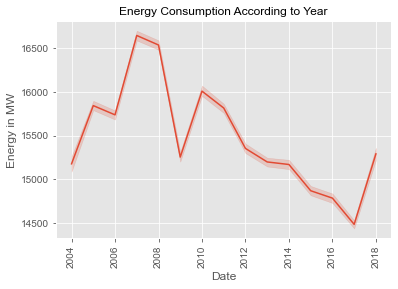

In [21]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
#plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

The above chart depicts that

the year 2007 is recorded the higgest energy consumption

the year 2017 is recorded the lowest energt consumption

#1 megawatt (MW) = 1,000 kilowatts = 1,000,000 watts.

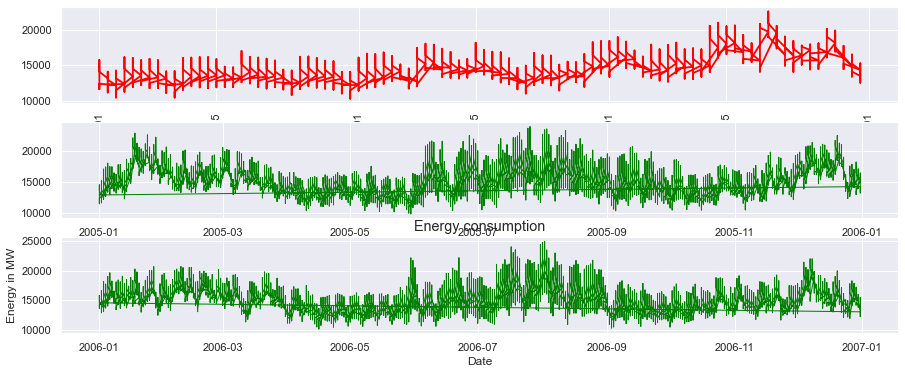

In [22]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="red", linewidth=1.8)


y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
#plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Ennergy Distribution')

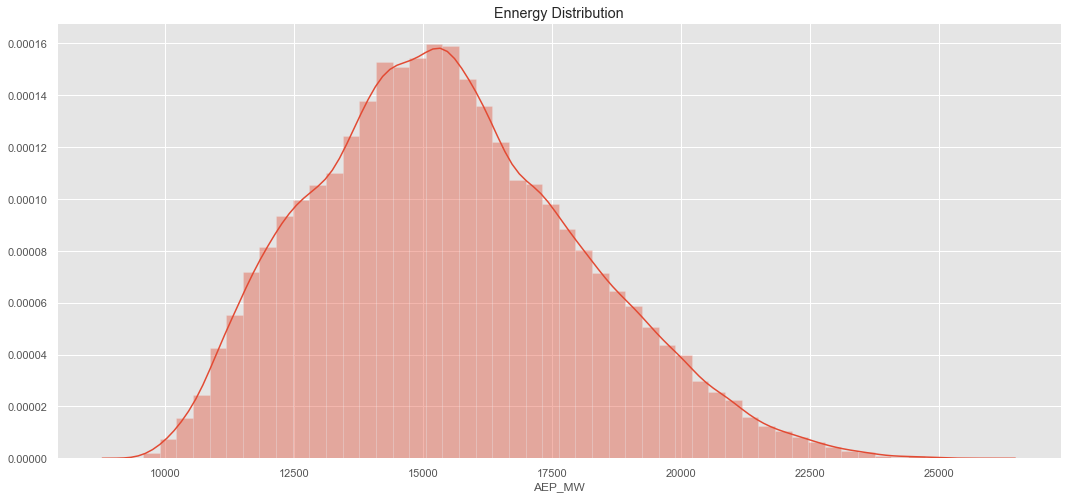

In [23]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

In [24]:
NewDataSet = dataset.resample('D').mean()

In [25]:
NewDataSet.head(5)

,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-01,14284.521739,10,2004,40
2004-10-02,12999.875000,10,2004,40
2004-10-03,12227.083333,10,2004,40
2004-10-04,14309.041667,10,2004,41
2004-10-05,14439.708333,10,2004,41


In [26]:
NewDataSet = dataset.resample('M').mean()

In [27]:
NewDataSet.head(5)

,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-31,13947.537736,10.0,2004.0,42.258760
2004-11-30,14830.440278,11.0,2004.0,46.666667
2004-12-31,16737.720430,12.0,2004.0,51.000000
2005-01-31,17117.088710,1.0,2005.0,5.838710
2005-02-28,16496.644345,2.0,2005.0,6.642857


In [28]:
NewDataSet.shape

(167, 4)

In [29]:
final_data = NewDataSet.drop(['Month','Year','Week'],axis = 1)

In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2004-10-31 to 2018-08-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AEP_MW  167 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


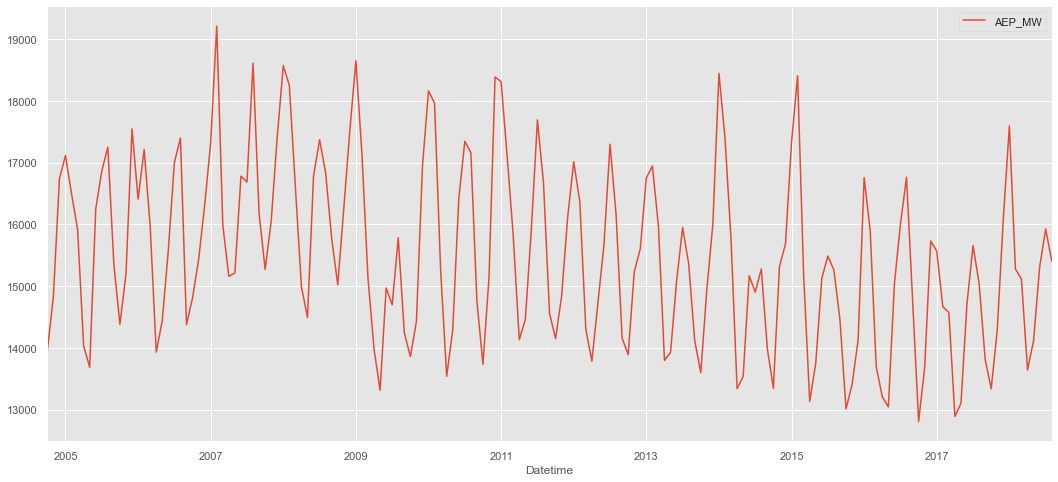

In [31]:
final_data.plot()

In [32]:
df['Sales First Difference'] = final_data['AEP_MW'] - final_data['AEP_MW'].shift(1)

In [33]:
df['Seasonal First Difference']=final_data['AEP_MW'] - final_data['AEP_MW'].shift(12)

In [40]:
df

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day,Sales First Difference,Seasonal First Difference
0,2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday,NaN,NaN
1,2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday,NaN,NaN
2,2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday,NaN,NaN
3,2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday,NaN,NaN
4,2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
121268,2018-01-01 20:00:00,21089.0,1,2018,2018-01-01,20:00:00,1,Monday,NaN,NaN
121269,2018-01-01 21:00:00,20999.0,1,2018,2018-01-01,21:00:00,1,Monday,NaN,NaN
121270,2018-01-01 22:00:00,20820.0,1,2018,2018-01-01,22:00:00,1,Monday,NaN,NaN
121271,2018-01-01 23:00:00,20415.0,1,2018,2018-01-01,23:00:00,1,Monday,NaN,NaN


In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [35]:
import statsmodels.api as sm

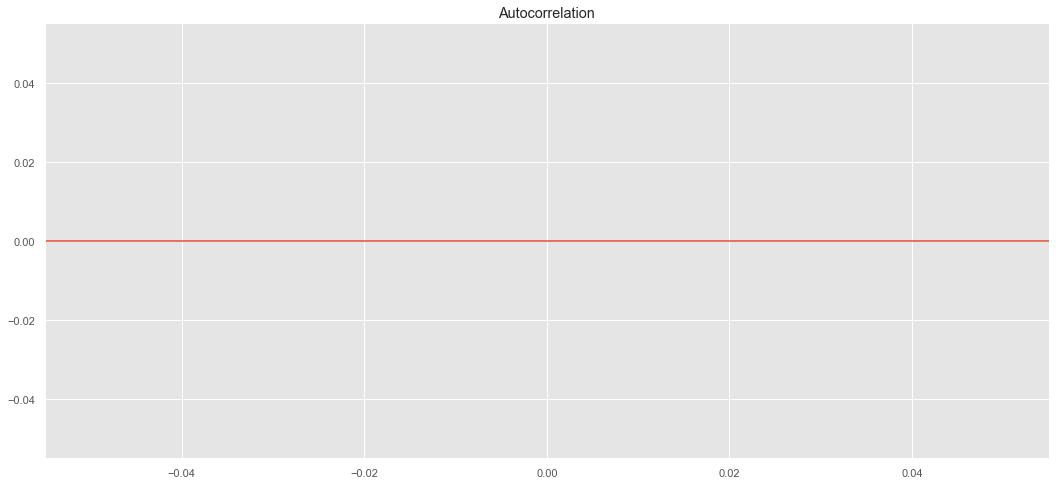

In [42]:
acf_plot = plot_acf(df['Sales First Difference'], lags = 12)

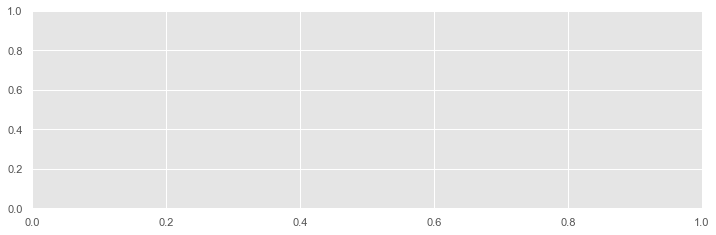

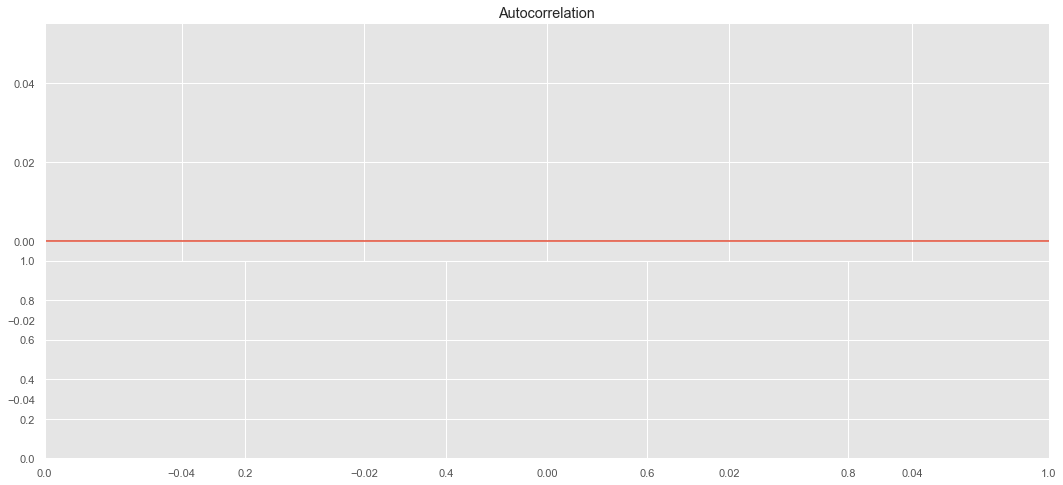

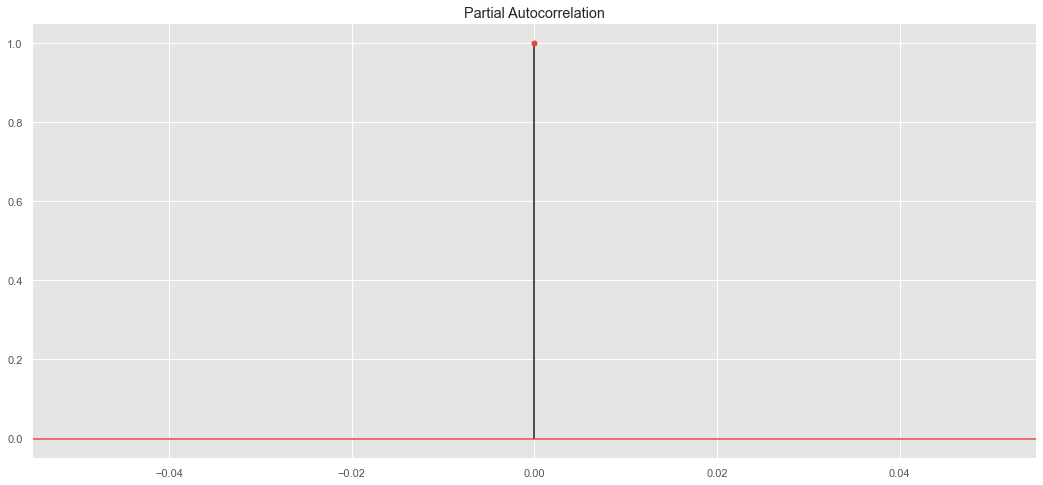

In [43]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=14)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=14)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(final_data['AEP_MW'],order=(1,1,1))
model_fit=model.fit()

In [104]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.AEP_MW   No. Observations:                  166
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1414.088
Method:                       css-mle   S.D. of innovations           1197.052
Date:                Wed, 18 Jan 2023   AIC                           2836.176
Time:                        17:49:33   BIC                           2848.624
Sample:                    11-30-2004   HQIC                          2841.229
                         - 08-31-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -9.1840      3.868     -2.375      0.018     -16.765      -1.604
ar.L1.D.AEP_MW     0.5119      0.068      7.511      0.000       0.378       0.645
ma.L1.D.AEP_MW    -1.0000      0.017    -60.028      0.000      -1.033      -0.967
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9536           +0.0000j            1.9536            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [106]:
import statsmodels.api as sm


In [118]:
model = sm.tmodel=sm.tsa.statespace.SARIMAX(final_data['AEP_MW'],order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()

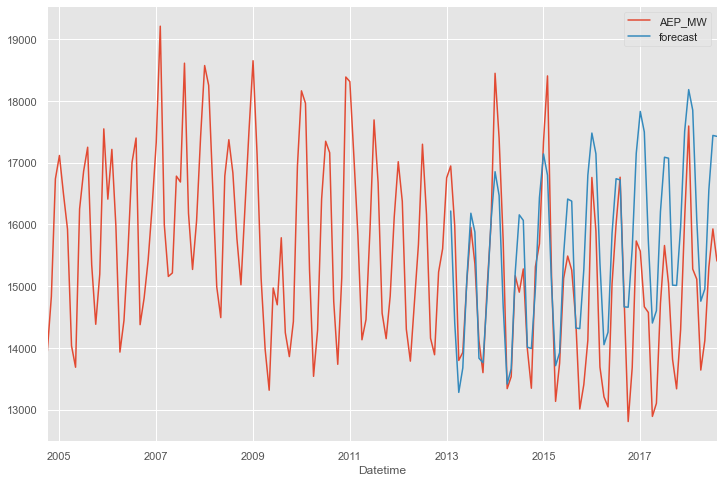

In [119]:
final_data['forecast'] = results.predict(start=100,end = 167,dynamic=True)
final_data[['AEP_MW','forecast']].plot(figsize=(12,8)) 

In [121]:

from pandas.tseries.offsets import DateOffset
future_dates=[final_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [122]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=final_data.columns)

In [123]:
future_datest_df.tail(5)

,AEP_MW,forecast
2020-03-31,NaN,NaN
2020-04-30,NaN,NaN
2020-05-31,NaN,NaN
2020-06-30,NaN,NaN
2020-07-31,NaN,NaN


In [128]:
future_df = pd.concat([final_data,future_datest_df])

In [130]:
future_df.shape

(190, 2)

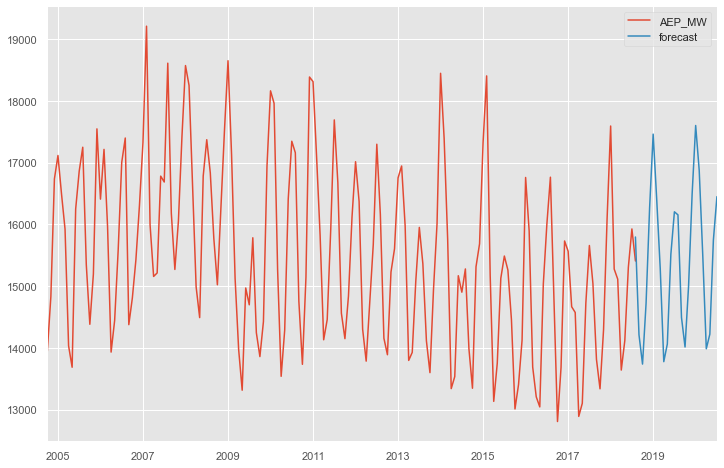

In [135]:
future_df['forecast'] = results.predict(start =166 , end = 190, dynamic= True)  
future_df[['AEP_MW', 'forecast']].plot(figsize=(12, 8)) 

In [140]:
future_df[['AEP_MW', 'forecast']].tail(50)

,AEP_MW,forecast
2016-06-30,15036.850000,NaN
2016-07-31,16004.576613,NaN
2016-08-31,16765.301075,NaN
2016-09-30,14788.736111,NaN
2016-10-31,12805.127688,NaN
2016-11-30,13680.450763,NaN
2016-12-31,15731.420699,NaN
2017-01-31,15566.197581,NaN
2017-02-28,14665.684524,NaN
2017-03-31,14572.872140,NaN


In [ ]:
for 